In [ ]:
pip install -U scikit-learn

     |████████████████████████████████| 22.3MB 5.9MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [31]:
import numpy as np
import tensorflow as tf
from numpy import loadtxt
import keras
from keras.layers import Dense, Dropout
from keras.models import Model, Sequential
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

In [4]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder

In [5]:
data = pd.read_csv("/content/drive/MyDrive/CS3244 Project/data_full_revised.csv")
data = data.drop(data.columns[[0]], axis=1)
data = data.replace([np.inf, -np.inf], np.nan).dropna(how="any")

In [6]:
X = data.iloc[:, :76].values
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
list(range(14))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [14]:
output_label = ['BENIGN', 'DDoS', 'DoS GoldenEye', 'DoS Hulk', 'DoS Slowhttptest', 'DoS slowloris', 'PortScan']

In [ ]:
a = data.iloc[:, 76].values
a = le.fit_transform(a)
b = le.inverse_transform(list(range(7)))
b

array(['BENIGN', 'DDoS', 'DoS GoldenEye', 'DoS Hulk', 'DoS Slowhttptest',
       'DoS slowloris', 'PortScan'], dtype=object)

In [7]:
label_y = data.iloc[:, 76].values
le = LabelEncoder()
label_y = le.fit_transform(label_y)

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, label_y, train_size = 2/3)

In [9]:
# 1 dimensional
splitted_y_train = y_train
splitted_y_test = y_test

In [10]:
y_train = pd.get_dummies(y_train, columns=["Label"])
y_test = pd.get_dummies(y_test, columns=["Label"])

In [20]:
b = le.inverse_transform(splitted_y_test)

In [ ]:
model = Sequential()
model.add(Dense(20, input_dim = 76, activation= "relu"))
model.add(Dropout(0.5))
model.add(Dense(25, activation= "relu"))
model.add(Dropout(0.5))
model.add(Dense(20, activation= "relu"))
model.add(Dense(7, activation= "softmax"))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, validation_data = (x_test,y_test), epochs=100, batch_size= 1000)

Epoch 1/100
803/803 [==============================] - 7s 7ms/step - loss: 0.9126 - accuracy: 0.6747 - val_loss: 0.1688 - val_accuracy: 0.9418
Epoch 2/100
803/803 [==============================] - 5s 7ms/step - loss: 0.2885 - accuracy: 0.9088 - val_loss: 0.1269 - val_accuracy: 0.9589
Epoch 3/100
803/803 [==============================] - 5s 7ms/step - loss: 0.2349 - accuracy: 0.9253 - val_loss: 0.1148 - val_accuracy: 0.9594
Epoch 4/100
803/803 [==============================] - 5s 7ms/step - loss: 0.2112 - accuracy: 0.9308 - val_loss: 0.1014 - val_accuracy: 0.9613
Epoch 5/100
803/803 [==============================] - 5s 7ms/step - loss: 0.1976 - accuracy: 0.9342 - val_loss: 0.0961 - val_accuracy: 0.9622
Epoch 6/100
803/803 [==============================] - 5s 6ms/step - loss: 0.1856 - accuracy: 0.9383 - val_loss: 0.0921 - val_accuracy: 0.9670
Epoch 7/100
803/803 [==============================] - 5s 7ms/step - loss: 0.1800 - accuracy: 0.9399 - val_loss: 0.0883 - val_accuracy: 0.9663

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, plot_confusion_matrix, multilabel_confusion_matrix, f1_score

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

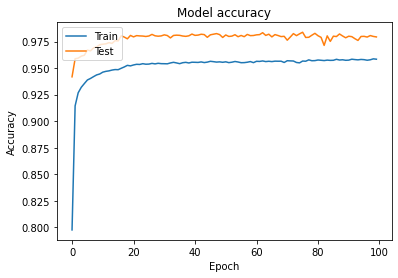

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

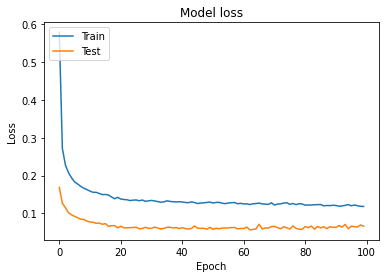

In [ ]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [ ]:
train_pred = np.argmax(model.predict(x_train), axis = 1)

In [ ]:
len(train_pred)

802134

In [ ]:
cm

array([[433507,    188,    122,   8702,      7,     62,      0],
       [   191,  85384,      0,     12,      0,      0,      0],
       [   508,      6,   6078,    224,     30,      1,      0],
       [   638,    183,      0, 152922,      0,      0,      0],
       [   839,      0,   2430,      0,    251,    189,      0],
       [   663,      0,    770,      1,     12,   2414,      0],
       [   982,     49,      0,     34,      0,      1, 104734]])

In [ ]:
cm = confusion_matrix(splitted_y_train, train_pred)
df_cm = pd.DataFrame(cm)

In [ ]:
recall_score(splitted_y_train, train_pred, average = None)

array([0.97948205, 0.99762814, 0.88768804, 0.99465992, 0.06767323,
       0.6253886 , 0.98992439])

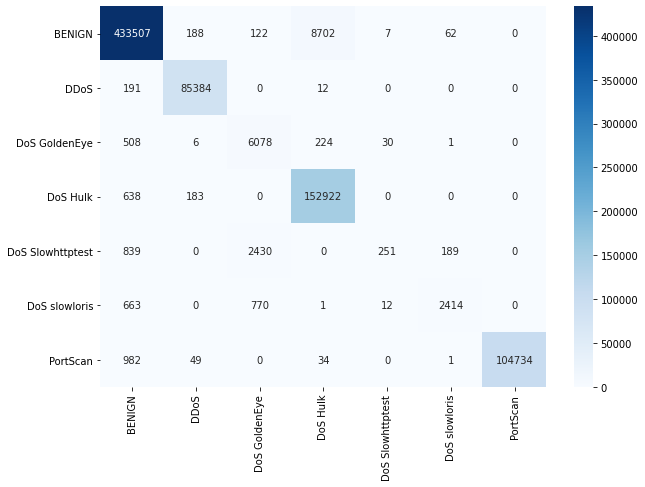

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, xticklabels = output_label, yticklabels= output_label, fmt = "d", cmap='Blues')

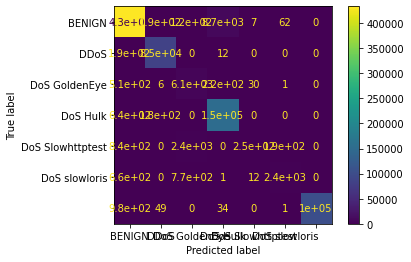

In [ ]:
a = ConfusionMatrixDisplay(cm, display_labels = output_label)
a.plot()

In [ ]:
accuracy_score(splitted_y_train, train_pred)

0.9790010147930396

In [ ]:
test_pred = np.argmax(model.predict(x_train), axis = 1)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay 
cm = confusion_matrix(splitted_y_train, train_pred)

precision_score(splitted_y_train, train_pred, average = None, zero_division = 0)

array([0.99126285, 0.99503554, 0.64659574, 0.94457519, 0.83666667,
       0.90513686, 1.        ])

In [ ]:
accuracy_score(splitted_y_train, train_pred)

0.9790010147930396

In [ ]:
recall_score(splitted_y_train, train_pred, average = None, zero_division = 0)

array([0.97948205, 0.99762814, 0.88768804, 0.99465992, 0.06767323,
       0.6253886 , 0.98992439])

In [12]:
test_pred = np.argmax(loaded_model.predict(x_test), axis = 1)

In [ ]:
cm_test = confusion_matrix(splitted_y_test, test_pred)
df_cm_test = pd.DataFrame(cm_test)

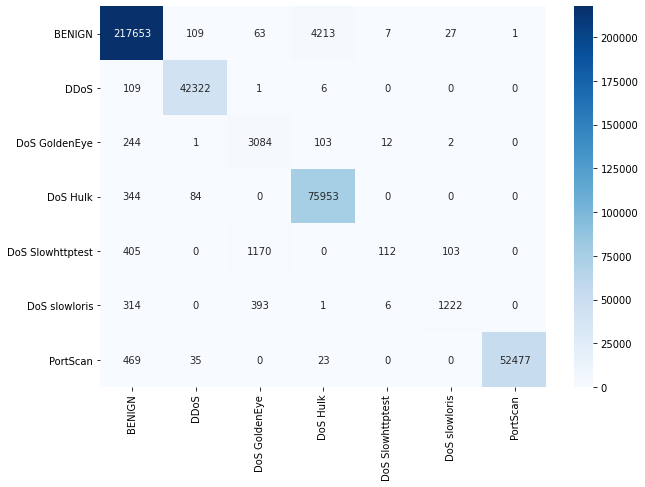

In [ ]:
plt.figure(figsize = (10,7))
sn.heatmap(df_cm_test, annot=True, xticklabels = output_label, yticklabels= output_label, fmt = "d", cmap='Blues')

In [ ]:
precision_score(splitted_y_test, test_pred, average = None, zero_division = 0)

array([0.99141379, 0.99461822, 0.65463808, 0.94587728, 0.81751825,
       0.90251108, 0.99998094])

In [ ]:
accuracy_score(splitted_y_test, test_pred)

0.9794423888218456

In [ ]:
recall_score(splitted_y_test, test_pred, average = None)

array([0.98009663, 0.9972666 , 0.89495067, 0.99439651, 0.06256983,
       0.63119835, 0.99005735])

In [ ]:
f1_score(splitted_y_test, test_pred, average = None)

array([0.98572273, 0.99594065, 0.75616035, 0.96953025, 0.11624286,
       0.74285714, 0.99499441])

In [ ]:
model.save("/content/drive/MyDrive/CS3244 Project/revised_model")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CS3244 Project/revised_model/assets


In [1]:
from tensorflow import keras
loaded_model = keras.models.load_model('/content/drive/MyDrive/CS3244 Project/revised_model')

In [35]:
a = np.array(output_label)
print(type(a))

<class 'numpy.ndarray'>


In [37]:
from sklearn.metrics import classification_report
print(classification_report(splitted_y_test, test_pred, target_names = output_label))

                  precision    recall  f1-score   support

          BENIGN       0.99      0.98      0.99    221660
            DDoS       0.99      1.00      1.00     42699
   DoS GoldenEye       0.65      0.89      0.75      3457
        DoS Hulk       0.94      0.99      0.97     76571
DoS Slowhttptest       0.84      0.06      0.12      1841
   DoS slowloris       0.90      0.62      0.73      1908
        PortScan       1.00      0.99      1.00     52932

        accuracy                           0.98    401068
       macro avg       0.90      0.79      0.79    401068
    weighted avg       0.98      0.98      0.98    401068

